In [23]:
!pip install geopandas matplotlib contextily cartopy shap ipywidgets


In [15]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [16]:
pos_data = pd.read_csv('/Users/I566184/bachelorarbeit_coding/mesogeos/ml_tracks/a_fire_danger/a.danger_forecasting/positives.csv')
neg_data = pd.read_csv('/Users/I566184/bachelorarbeit_coding/mesogeos/ml_tracks/a_fire_danger/a.danger_forecasting/negatives.csv')

In [17]:
#4. Fire in Spain not regocnized as positive
pos_data[pos_data['sample'] == 1645]

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
49350,2022-05-17,36.664577,0.0,-11440.387,283.96823,949.5649,0.0,1.5,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,0,1645
49351,2022-05-18,36.664577,0.0,-11440.387,283.93564,949.5649,0.0,1.5,NaN,284.38000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,1,1645
49352,2022-05-19,36.664577,0.0,-11440.387,285.07065,949.5649,0.0,1.5,299.08000,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,2,1645
49353,2022-05-20,36.664577,0.0,-11440.387,285.68314,949.5649,0.0,1.5,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,3,1645
49354,2022-05-21,36.664577,0.0,-11440.387,285.79310,949.5649,0.0,1.5,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,4,1645
49355,2022-05-22,36.664577,0.0,-11440.387,284.34592,949.5649,0.0,1.5,NaN,283.90000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,5,1645
49356,2022-05-23,36.664577,0.0,-11440.387,277.89755,949.5649,0.0,1.5,286.75998,278.32000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,6,1645
49357,2022-05-24,36.664577,0.0,-11440.387,277.82610,949.5649,0.0,1.5,286.10000,277.62000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,7,1645
49358,2022-05-25,36.664577,0.0,-11440.387,280.20220,949.5649,0.0,2.2,292.66000,282.02000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,8,1645
49359,2022-05-26,36.664577,0.0,-11440.387,281.22302,949.5649,0.0,2.2,297.38000,285.58000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,9,1645


In [23]:
#all big fires compared, the day before ignition
pos_data_filtered = pos_data[((pos_data['time_idx'] == 29) & ((pos_data['sample'] == 679) | (pos_data['sample'] == 1645)  ))]
pos_data_filtered

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
20399,2022-07-16,156.990740,1.0,1254.0588,287.18048,795.34845,0.0,0.7,NaN,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.209230,32528.0,29,679
49379,2022-06-15,36.664577,1.0,-11440.3870,288.30984,949.56490,0.0,2.4,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,3.367628,28046.0,29,1645


In [18]:
#false negative predicted samples from most models
sample_ids = [15499, 15593, 16713, 16701, 16886, 15494, 17040, 16781, 16735, 14600, 15334, 15341, 16696]
neg_data_filtered = neg_data[(neg_data['time_idx'] == 29) & (neg_data['sample'].isin(sample_ids))]
neg_data_filtered

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
438029,2021-01-07,173.031170,0.0,-5737.091000,273.16830,884.14710,0.0,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,432.224880,0.0,29,14600
460049,2021-06-30,239.197720,0.0,15.146637,284.23940,56.22079,0.0,1.3,309.68000,295.16000,...,0.000000,0.0,0.522380,0.000000,0.0,0.0,17.952684,0.0,29,15334
460259,2021-07-01,223.943000,0.0,-3076.751700,284.76968,641.71180,0.0,1.8,316.36000,293.63998,...,0.000000,0.0,0.000000,0.015876,0.0,0.0,5.271874,0.0,29,15341
464849,2021-07-29,157.198560,0.0,33322.990000,292.00018,508.86450,0.0,1.8,311.40000,300.12000,...,0.000000,0.0,0.262548,0.000000,0.0,0.0,17.130157,0.0,29,15494
464999,2021-07-30,251.079420,0.0,4590.613000,288.08023,360.87120,0.0,2.2,313.08000,296.22000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.477857,0.0,29,15499
467819,2021-08-17,228.551040,0.0,-9276.050000,292.02750,549.33124,0.0,1.9,310.25998,294.19998,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,17.954426,0.0,29,15593
500909,2022-06-10,115.688920,0.0,10042.932000,287.41763,570.94360,0.0,1.9,309.38000,294.66000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,9.316117,0.0,29,16696
501059,2022-06-11,47.522300,0.0,-32143.469000,290.81393,435.25052,0.0,0.6,316.13998,NaN,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,31.014591,0.0,29,16701
501419,2022-06-13,194.754750,0.0,19778.309000,289.06348,543.53860,0.0,0.6,313.13998,300.32000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,144.507980,0.0,29,16713
502079,2022-06-17,283.656100,0.0,3429.925500,287.54047,862.60550,0.0,1.1,NaN,298.75998,...,0.000000,0.0,0.127940,0.000000,0.0,0.0,23.629970,0.0,29,16735


In [6]:
neg_data.columns

Index(['time', 'aspect', 'burned_areas', 'curvature', 'd2m', 'dem',
       'ignition_points', 'lai', 'lst_day', 'lst_night', 'ndvi', 'rh',
       'roads_distance', 'slope', 'smi', 'sp', 'ssrd', 't2m', 'tp',
       'wind_direction', 'wind_speed', 'x', 'y', 'lc_agriculture', 'lc_forest',
       'lc_grassland', 'lc_settlement', 'lc_shrubland', 'lc_sparse_vegetation',
       'lc_water_bodies', 'lc_wetland', 'population', 'burned_area_has',
       'time_idx', 'sample'],
      dtype='object')

In [5]:
neg_data[neg_data['time'].str.startswith("2022-")]

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
482459,2022-01-01,70.536630,0.0,-637.76245,280.54846,1070.19120,0.0,0.9,NaN,NaN,...,0.061771,0.0,0.0,0.000000,0.0,0.0,0.775446,0.0,29,16081
482488,2022-01-01,0.413488,0.0,-1273.68770,282.54196,790.37460,0.0,0.1,NaN,NaN,...,0.000000,0.0,0.0,0.000000,0.0,0.0,1.104320,0.0,28,16082
482489,2022-01-02,0.413488,0.0,-1273.68770,281.18990,790.37460,0.0,0.1,NaN,NaN,...,0.000000,0.0,0.0,0.000000,0.0,0.0,1.104320,0.0,29,16082
482517,2022-01-01,47.310810,0.0,-4810.30860,280.31380,869.11426,0.0,0.5,295.00000,277.68,...,0.005210,0.0,0.0,0.060826,0.0,0.0,2.920710,0.0,27,16083
482518,2022-01-02,47.310810,0.0,-4810.30860,279.11570,869.11426,0.0,0.5,291.16000,278.72,...,0.005210,0.0,0.0,0.060826,0.0,0.0,2.920710,0.0,28,16083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520255,2022-09-25,3.546495,0.0,19832.52000,286.20728,1145.07540,0.0,0.8,NaN,NaN,...,0.000000,0.0,0.0,0.000000,0.0,0.0,13.033438,0.0,25,17341
520256,2022-09-26,3.546495,0.0,19832.52000,283.32666,1145.07540,0.0,0.8,NaN,NaN,...,0.000000,0.0,0.0,0.000000,0.0,0.0,13.033438,0.0,26,17341
520257,2022-09-27,3.546495,0.0,19832.52000,283.23392,1145.07540,0.0,0.8,293.06000,285.18,...,0.000000,0.0,0.0,0.000000,0.0,0.0,13.033438,0.0,27,17341
520258,2022-09-28,3.546495,0.0,19832.52000,284.11914,1145.07540,0.0,0.8,295.28000,NaN,...,0.000000,0.0,0.0,0.000000,0.0,0.0,13.033438,0.0,28,17341


In [6]:
pos_testing= pos_data[((pos_data['time'].str.startswith("2022-")) | (pos_data['time'].str.startswith("2021-"))) & (pos_data['time_idx'] == 29)]
pos_testing

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
18659,2021-01-18,330.926760,1.0,27889.11100,278.40756,951.85754,187.0,0.3,285.40000,275.60000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,187.0,29,621
18689,2021-01-21,244.666500,1.0,-29852.34400,281.24326,1219.92740,715.0,0.5,281.30000,276.72000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.494251,715.0,29,622
18719,2021-08-16,200.106870,1.0,1930.79220,284.69240,371.17110,496.0,0.3,322.96000,294.94000,...,0.093017,0.0,0.000000,0.000000,0.0,0.0,0.993970,496.0,29,623
18749,2021-03-19,178.949280,1.0,-7572.59500,270.02072,1258.73470,0.0,0.9,282.90000,274.28000,...,0.000000,0.0,0.062307,0.000000,0.0,0.0,2.488285,86.0,29,624
18779,2021-03-20,177.769820,1.0,9283.96000,270.90590,649.50960,38.0,1.4,285.38000,274.08000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,5.995989,38.0,29,625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256949,2021-06-19,331.964400,0.0,-6348.14450,282.66510,1198.93420,0.0,0.6,316.53998,297.41998,...,0.000000,0.0,1.000000,0.000000,0.0,0.0,8.555197,159.0,29,8564
256979,2021-06-29,106.676544,0.0,447.27173,288.14820,481.60940,0.0,0.5,314.78000,297.36000,...,0.000000,0.0,0.321138,0.100552,0.0,0.0,87.012764,219.0,29,8565
257009,2021-07-03,313.479160,1.0,10734.83900,285.30820,1077.00220,920.0,0.5,318.90000,296.04000,...,0.000000,0.0,0.168196,0.000000,0.0,0.0,21.462292,920.0,29,8566
257039,2021-07-03,242.836650,1.0,-8640.33200,286.19412,1137.27860,820.0,0.2,NaN,297.08000,...,0.000000,0.0,0.118920,0.000000,0.0,0.0,6.342142,820.0,29,8567


### Plot der positiven Proben mit Cartopy

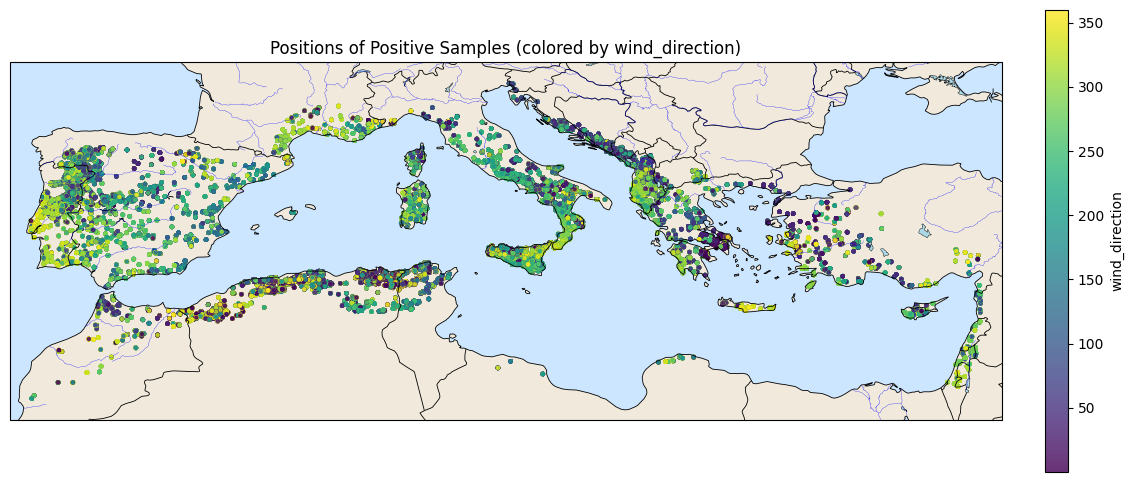

In [21]:

x = pos_data['x']
y = pos_data['y']
influence_variable = pos_data['wind_direction']

# Plot mit Cartopy
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([x.min() - 1, x.max() + 1, y.min() - 1, y.max() + 1], crs=ccrs.PlateCarree())
#ax.stock_img()

# Features hinzufügen
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#f0e9dc')  # Sandfarben
ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='#cce6ff')  # Hellblau
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.6)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.6)
ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='lightblue', edgecolor='k', linewidth=0.3)
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='blue', linewidth=0.2)

# Scatter mit Farbe nach Population
sc = ax.scatter(x, y, c=influence_variable, cmap='viridis', s=5, alpha=0.8, vmin=influence_variable.min(), vmax=influence_variable.max(), transform=ccrs.PlateCarree())

# Farbskala
cb = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cb.set_label(f'{influence_variable.name}')

# Titel
plt.title(f"Positions of Positive Samples (colored by {influence_variable.name})")

plt.show()

In [45]:
ignition_dates = pos_data[pos_data['time_idx'] == 0]
sum_ignition = ignition_dates['time'].count()
sum_ignition

np.int64(8574)

Vergleich der NaN-Werte in lst_day, lst_night und t2m zwischen den Zünddaten und den Nicht-Zünddaten